# Import

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import sklearn as sk
from sklearn.preprocessing import StandardScaler

# Data processing for visualisation

In [199]:
df = pd.read_csv (r'ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [200]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight','high_cal_food_freq', 'vegetable_freq', 'nb_main_meal', 'snack_freq', 'SMOKE', 'Cons_H2O', 'cal_count', 'sport_freq', 'screen_time','Cons_ALC', 'Means_TRANS', 'label']

In [201]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,high_cal_food_freq,vegetable_freq,nb_main_meal,snack_freq,SMOKE,Cons_H2O,cal_count,sport_freq,screen_time,Cons_ALC,Means_TRANS,label
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [202]:
df.shape

(2111, 17)

In [203]:
#checking for duplicated rows and missing values
print(df.duplicated().sum())
print(df.isnull().sum().sum())

24
0


In [204]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
     Gender   Age  ...            Means_TRANS                label
98   Female  21.0  ...  Public_Transportation  Insufficient_Weight
106  Female  25.0  ...  Public_Transportation        Normal_Weight
174    Male  21.0  ...  Public_Transportation   Overweight_Level_I
179    Male  21.0  ...  Public_Transportation   Overweight_Level_I
184    Male  21.0  ...  Public_Transportation   Overweight_Level_I
209  Female  22.0  ...  Public_Transportation        Normal_Weight
309  Female  16.0  ...                Walking        Normal_Weight
460  Female  18.0  ...  Public_Transportation        Normal_Weight
467    Male  22.0  ...             Automobile        Normal_Weight
496    Male  18.0  ...  Public_Transportation  Insufficient_Weight
527  Female  21.0  ...  Public_Transportation  Insufficient_Weight
659  Female  21.0  ...  Public_Transportation  Insufficient_Weight
663  Female  21.0  ...  Public_Transportation  Insufficient_Wei

We think it's not relevant to get rid of the duplicated values ( maybe even detrimental )

Their is no missing values so we can go on with the visualization

In [205]:
#checking types
df.dtypes.sort_values()

Age                               float64
Height                            float64
Weight                            float64
screen_time                       float64
vegetable_freq                    float64
nb_main_meal                      float64
sport_freq                        float64
Cons_H2O                          float64
Gender                             object
Cons_ALC                           object
cal_count                          object
snack_freq                         object
Means_TRANS                        object
high_cal_food_freq                 object
family_history_with_overweight     object
SMOKE                              object
label                              object
dtype: object

In [206]:
df.describe()

,Age,Height,Weight,vegetable_freq,nb_main_meal,Cons_H2O,sport_freq,screen_time
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [207]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Gender
['Female' 'Male']
family_history_with_overweight
['yes' 'no']
high_cal_food_freq
['no' 'yes']
snack_freq
['Sometimes' 'Frequently' 'Always' 'no']
SMOKE
['no' 'yes']
cal_count
['no' 'yes']
Cons_ALC
['no' 'Sometimes' 'Frequently' 'Always']
Means_TRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
label
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [208]:
df.select_dtypes(object).columns

Index(['Gender', 'family_history_with_overweight', 'high_cal_food_freq',
       'snack_freq', 'SMOKE', 'cal_count', 'Cons_ALC', 'Means_TRANS', 'label'],
      dtype='object')

# Data visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


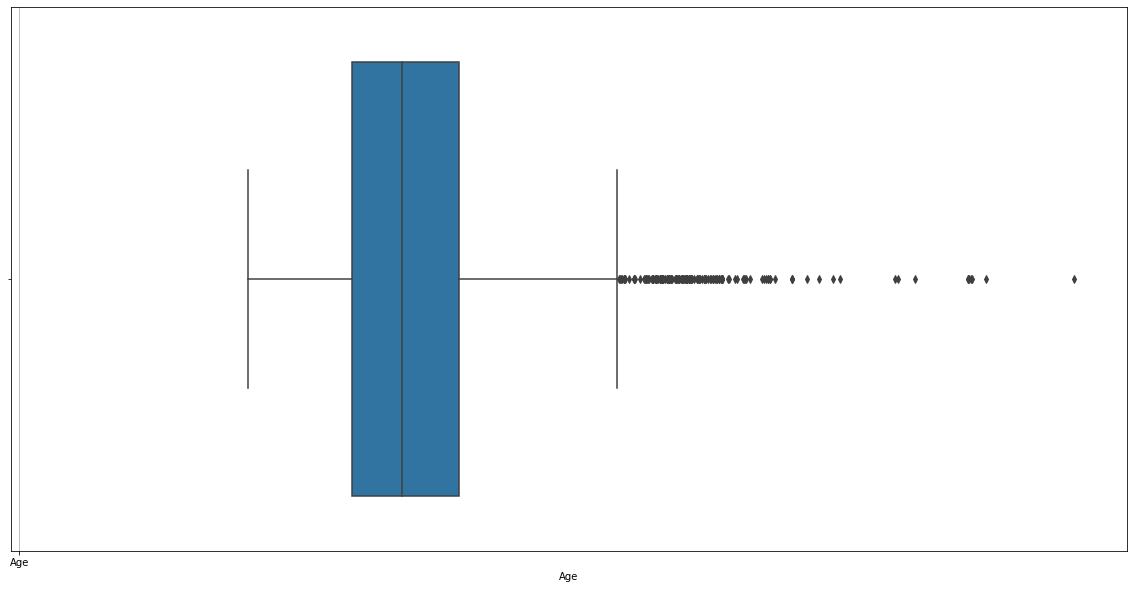

In [209]:
#df.plot(1,kind='box', title='boxplot', showmeans=True,figsize=(20,10))
df.boxplot("Age",figsize=(20,10))
sns.boxplot(df.Age)

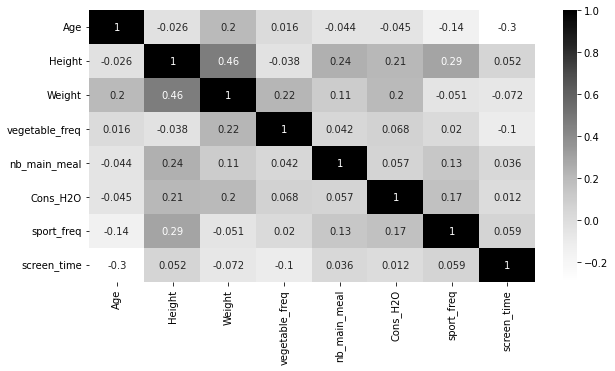

In [210]:
#Pearson’s Correlations, which measures the strength of a linear relationship
sns.heatmap(df.corr(method='pearson'), cmap="Greys", annot=True)

In [211]:
list(df.groupby('SMOKE')["Gender"].count())

[2067, 44]

In [212]:
rcParams['figure.figsize'] = 10,5

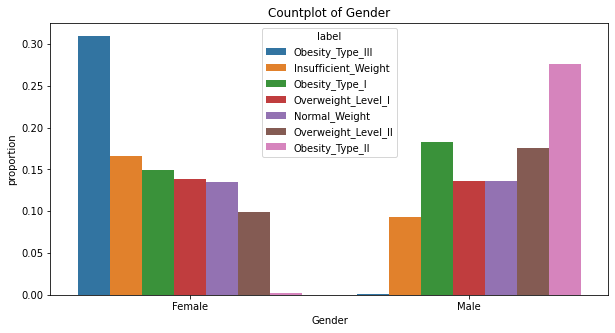

Number of occurence per categorie for Gender :  {'Female': 1043, 'Male': 1068}


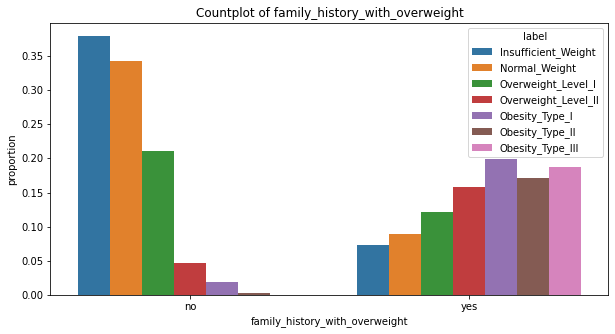

Number of occurence per categorie for family_history_with_overweight :  {'no': 385, 'yes': 1726}


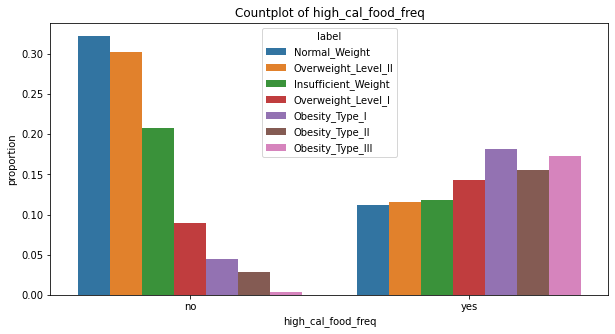

Number of occurence per categorie for high_cal_food_freq :  {'no': 245, 'yes': 1866}


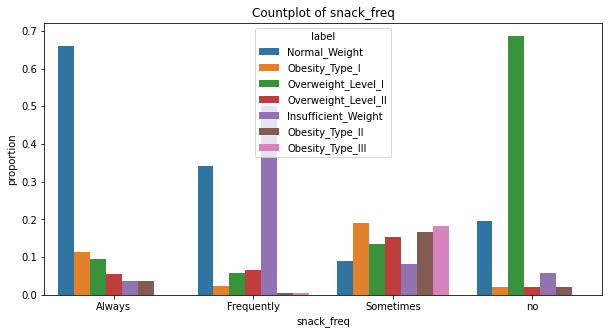

Number of occurence per categorie for snack_freq :  {'Always': 53, 'Frequently': 242, 'Sometimes': 1765, 'no': 51}


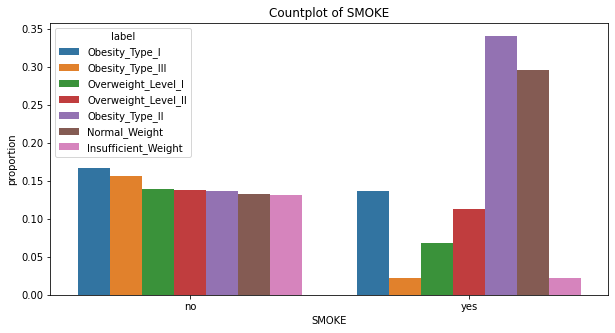

Number of occurence per categorie for SMOKE :  {'no': 2067, 'yes': 44}


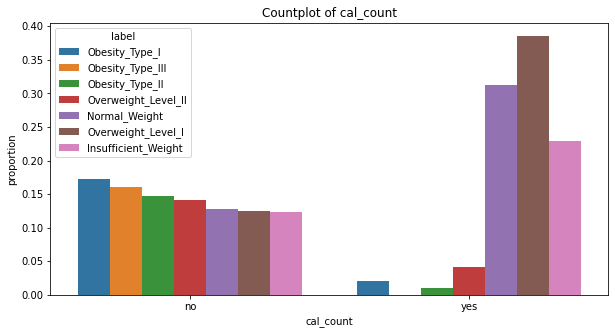

Number of occurence per categorie for cal_count :  {'no': 2015, 'yes': 96}


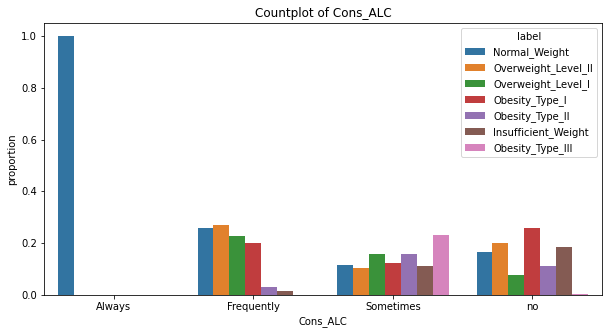

Number of occurence per categorie for Cons_ALC :  {'Always': 1, 'Frequently': 70, 'Sometimes': 1401, 'no': 639}


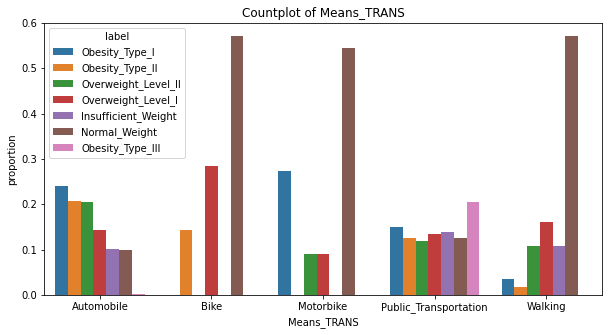

Number of occurence per categorie for Means_TRANS :  {'Automobile': 457, 'Bike': 7, 'Motorbike': 11, 'Public_Transportation': 1580, 'Walking': 56}


In [213]:
for f in ['Gender', 'family_history_with_overweight', 'high_cal_food_freq','snack_freq', 'SMOKE', 'cal_count', 'Cons_ALC', 'Means_TRANS']:
    x,y = f, 'label'
    test = (df.groupby(x)[y].value_counts(normalize=True).rename('proportion').reset_index())
    sns.barplot(x=x, y="proportion", hue=y, data=test)
    plt.title("Countplot of {}".format(f))
    plt.show()
    print("Number of occurence per categorie for {} : ".format(f),dict(df.groupby(x)["Gender"].count()))

# Data processing for ML

In [20]:
df.select_dtypes(object).columns

Index(['Gender', 'family_history_with_overweight', 'high_cal_food_freq',
       'snack_freq', 'SMOKE', 'cal_count', 'Cons_ALC', 'Means_TRANS', 'label'],
      dtype='object')

In [21]:
# std_scaler = StandardScaler() 
# df_scaled = std_scaler.fit_transform(df.to_numpy())
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [22]:
df['Gender'] = df.Gender.replace({'Male':0, 'Female':1})
df['family_history_with_overweight'] = df.family_history_with_overweight.replace({'yes':0, 'no':1})
df['high_cal_food_freq'] = df.high_cal_food_freq.replace({'yes':0, 'no':1})
df['SMOKE'] = df.SMOKE.replace({'yes':0, 'no':1})
df['cal_count'] = df.cal_count.replace({'yes':0, 'no':1})
df['snack_freq'] = df.snack_freq.replace({'Sometimes':1, 'Frequently':2, 'Always':3, 'no':0})
df['Cons_ALC'] = df.Cons_ALC.replace({'Sometimes':1, 'Frequently':2, 'Always':3, 'no':0})
df['Means_TRANS'] = df.Means_TRANS.replace({'Public_Transportation':1, 'Walking':3, 'Automobile':0, 'Motorbike':2, 'Bike':4})
df['label'] = df.label.replace({'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Insufficient_Weight':0,'Obesity_Type_II':5, 'Obesity_Type_III':6})

## Data predictions with weight and height

In [64]:
X = df.loc[:,df.columns != 'label']
y = df.label

### Random forest

In [65]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
rf_accuracy = sk.metrics.accuracy_score(val_y,list(map(round,rf_val_predictions)))

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))
print("Accuracy by rounding predicted results into classes: {}".format(rf_accuracy))

Validation MAE for Random Forest Model: 0.07551136363636361
Accuracy by rounding predicted results into classes: 0.9659090909090909


Here we can see that a simple random forest without neither gridsearch nor further modification gives a really decent results with a really good MAE and accuracy

This is because we are trying to predict the BMI which depends only on the height and weight who are both in the dataset.


## Data predictions without weight and height


We get rid of the columns Height and Weight in order to predict the BMI with only the habits and practices

In [167]:
features = ['Gender',
 'Age',
 'family_history_with_overweight',
 'high_cal_food_freq',
 'vegetable_freq',
 'nb_main_meal',
 'snack_freq',
 'SMOKE',
 'Cons_H2O',
 'cal_count',
 'sport_freq',
 'screen_time',
 'Cons_ALC',
 'Means_TRANS',]

In [168]:
X=df[features]

In [169]:
y = df.label

In [170]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

### Random Forest

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
rf_accuracy = sk.metrics.accuracy_score(val_y,list(map(round,rf_val_predictions)))
mod1 = pd.DataFrame({"Model":"Random Forest","Accuracy":rf_accuracy,"MAE":rf_val_mae},index =[0])

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))
print("Accuracy : {}".format(rf_accuracy))

Validation MAE for Random Forest Model: 0.43170454545454545
Accuracy : 0.7178030303030303


In [111]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
for item in rf_model.get_params().items():
  print(item)

Parameters currently in use:

('bootstrap', True)
('ccp_alpha', 0.0)
('criterion', 'squared_error')
('max_depth', None)
('max_features', 'auto')
('max_leaf_nodes', None)
('max_samples', None)
('min_impurity_decrease', 0.0)
('min_samples_leaf', 1)
('min_samples_split', 2)
('min_weight_fraction_leaf', 0.0)
('n_estimators', 100)
('n_jobs', None)
('oob_score', False)
('random_state', 1)
('verbose', 0)
('warm_start', False)


In [112]:
from sklearn.model_selection import GridSearchCV

In [151]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': [3],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2,0.8],
    'n_estimators': [1000]
}

rf_model_grid = RandomForestRegressor()

In [152]:
grid_search = GridSearchCV(estimator = rf_model_grid, param_grid = param_grid, n_jobs = -1, return_train_score=True)

In [153]:
grid_search.fit(train_X, train_y)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': [3], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 0.8],
                         'n_estimators': [1000]},
             return_train_score=True)

In [157]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [158]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_features=3, n_estimators=1000)

In [159]:
rf_val_predictions = best_grid.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
rf_accuracy = sk.metrics.accuracy_score(val_y,list(map(round,rf_val_predictions)))

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))
print("Accuracy : {}".format(rf_accuracy))

Validation MAE for Random Forest Model: 0.4715965909090909
Accuracy : 0.6837121212121212


### Decision Tree Classifier

In [172]:
from sklearn.tree import DecisionTreeClassifier
DTclf_model=DecisionTreeClassifier()
DTclf_model.fit(train_X, train_y)
DTclf_val_predictions = DTclf_model.predict(val_X)
DTclf_val_mae = mean_absolute_error(DTclf_val_predictions, val_y)
DTclf_accuracy = sk.metrics.accuracy_score(val_y,list(map(round,DTclf_val_predictions)))
mod2 = pd.DataFrame({"Model":"Decision Tree CLassifier","Accuracy":DTclf_accuracy,"MAE":DTclf_val_mae},index =[0])

print("Validation MAE for Decision Tree Classifier: {}".format(DTclf_val_mae))
print("Accuracy : {}".format(DTclf_accuracy))

Validation MAE for Decision Tree Classifier: 0.4602272727272727
Accuracy : 0.7462121212121212


### KNN

In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [178]:
# pipeline combining transformers and estimator
pipe_knn= make_pipeline(StandardScaler(), KNeighborsClassifier())
 
# grid searh to choose the best (combination of) hyperparameters
gs_knn=GridSearchCV(estimator= pipe_knn,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7]},
               scoring='accuracy')

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_knn_scores = cross_val_score(gs_knn, X=train_X, y=train_y, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_knn.fit(train_X, train_y)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(train_X, train_y)

knn_val_predictions = gs_knn_best.predict(val_X)
knn_val_mae = mean_absolute_error(knn_val_predictions, val_y)
knn_accuracy = sk.metrics.accuracy_score(val_y,list(map(round,knn_val_predictions)))
mod3 = pd.DataFrame({"Model":"Knn","Accuracy":knn_accuracy,"MAE":knn_val_mae},index =[0])

print("Validation MAE for Knn: {}".format(knn_val_mae))
print("Accuracy : {}".format(knn_accuracy))

Validation MAE for Knn: 0.38446969696969696
Accuracy : 0.7840909090909091


### SGD Classifier

In [184]:
from sklearn.linear_model import SGDClassifier
SGDC_model=SGDClassifier()
SGDC_model.fit(train_X, train_y)
SGDC_val_predictions = SGDC_model.predict(val_X)
SGDC_val_mae = mean_absolute_error(SGDC_val_predictions, val_y)
SGDC_accuracy = sk.metrics.accuracy_score(val_y,list(map(round,SGDC_val_predictions)))
mod4 = pd.DataFrame({"Model":"SGD classifier","Accuracy":SGDC_accuracy,"MAE":SGDC_val_mae},index =[0])

print("Validation MAE for Decision Tree Classifier: {}".format(SGDC_val_mae))
print("Accuracy : {}".format(SGDC_accuracy))

Validation MAE for Decision Tree Classifier: 1.1950757575757576
Accuracy : 0.3996212121212121


### Logistic regression

In [185]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(train_X, train_y)
LR_val_predictions = LR_model.predict(val_X)
LR_val_mae = mean_absolute_error(LR_val_predictions, val_y)
LR_accuracy = sk.metrics.accuracy_score(val_y,list(map(round,LR_val_predictions)))
mod5 = pd.DataFrame({"Model":"Logistic regression","Accuracy":LR_accuracy,"MAE":LR_val_mae},index =[0])

print("Validation MAE for Decision Tree Classifier: {}".format(LR_val_mae))
print("Accuracy : {}".format(LR_accuracy))

Validation MAE for Decision Tree Classifier: 0.8371212121212122
Accuracy : 0.5397727272727273


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Comparaison of models

In [186]:
Comp = pd.concat([mod1,mod2,mod3,mod4,mod5])
Comp = Comp.set_index("Model")
Comp

,Accuracy,MAE
Model,,
Random Forest,0.717803,0.431705
Decision Tree CLassifier,0.342803,1.000000
Knn,0.820076,0.354167
SGD classifier,0.399621,1.195076
Logistic regression,0.539773,0.837121


In [196]:
# pipeline combining transformers and estimator
pipe_knn= make_pipeline(StandardScaler(), KNeighborsClassifier())
 
param = {'kneighborsclassifier__n_neighbors':[4,5,6,7],
         'kneighborsclassifier__weights':['uniform', 'distance'],
         'kneighborsclassifier__leaf_size':[25,30,35],
         'kneighborsclassifier__p':[1,2],
         kneighborsclassifier__n_jobs':[-1]}
# grid searh to choose the best (combination of) hyperparameters
gs_knn=GridSearchCV(estimator= pipe_knn,
               param_grid=param,
               scoring='accuracy',
               cv=10)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_knn_scores = cross_val_score(gs_knn, X=train_X, y=train_y, cv=10,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_knn.fit(train_X, train_y)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(train_X, train_y)

knn_val_predictions = gs_knn_best.predict(val_X)
knn_val_mae = mean_absolute_error(knn_val_predictions, val_y)
knn_accuracy = sk.metrics.accuracy_score(val_y,list(map(round,knn_val_predictions)))

print("Validation MAE for Knn: {}".format(knn_val_mae))
print("Accuracy : {}".format(knn_accuracy))

Validation MAE for Knn: 0.3541666666666667
Accuracy : 0.8200757575757576


In [194]:
gs_knn.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=4,
                                      p=1, weights='distance'))])